In [14]:
import os, sys, glob

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal

import mne

import tensorpac
import pactools

import nf_tools.preprocessing as nftprep

In [15]:
condition = 'encoding'
outputs_group = '../outputs/group'
os.makedirs(outputs_group, exist_ok=True)

In [16]:
subjs_list = [10, 11, 12, 13]
itpc_group, xfreq_group, epow_group = [], [], []

# Set subject ID

for j, _fm in enumerate(np.arange(1, 4.4, 0.5)):

    itpc, xfreq, epow = [], [], []
    for subj_id in subjs_list:

        subj_name = f'subj_{subj_id}'
        outputs_path = '../outputs'
        data_path = '../data'
        meg_dir = os.path.join(data_path, f'subj_{subj_id}', 'meg')
        mri_dir = os.path.join(data_path, f'subj_{subj_id}', 'mri')
        fs_subjs_dir = os.path.join(data_path, 'fs_subjects_dir')
        srcs_dir = os.path.join(outputs_path, subj_name, 'source_space')
        srcs_itc_dir = os.path.join(outputs_path, subj_name, 'source_space_itc')
        srcs_itc_dir_files = os.path.join(srcs_itc_dir, 'files')

        itpc.append(np.load(os.path.join(srcs_itc_dir_files, f'itpc_{condition}_{_fm}.npy'), allow_pickle=True))
        xfreq.append(np.load(os.path.join(srcs_itc_dir_files, f'xfreq_{condition}_{_fm}.npy'), allow_pickle=True))
        epow.append(np.load(os.path.join(srcs_itc_dir_files, f'epow_{condition}_{_fm}.npy'), allow_pickle=True))

    itpc_group.append(itpc)
    xfreq_group.append(xfreq)
    epow_group.append(epow)

In [17]:
len(itpc_group), len(itpc_group[0])



(7, 4)

In [18]:
# Read individual labels
labels_indv, label2index_indv = [], []

for subj_id in subjs_list:

        subj_name = f'subj_{subj_id}'
        data_path = '../data'
        fs_subjs_dir = os.path.join(data_path, 'fs_subjects_dir')
        
        labels = mne.read_labels_from_annot(subject=subj_name, parc='BN_Atlas', hemi='both', 
                                        surf_name='white', annot_fname=None, regexp=None, 
                                        subjects_dir=fs_subjs_dir, sort=True, verbose=False)
        # Create label to index dictionary
        label2index = {label.name: i for i, label in enumerate(labels)}

        labels_indv.append(labels)
        #label2index_indv.append(label2index)

print(len(labels_indv), len(labels_indv[0]))

4 212


In [19]:
ix_label = 5
print(labels_indv[0][ix_label])
print(labels_indv[1][ix_label])
print(labels_indv[2][ix_label])
print(labels_indv[3][ix_label])
print(len(labels_indv[0]), len(labels_indv[1]), len(labels_indv[2]), len(labels_indv[3]))

<Label | subj_10, 'A1/2/3tru_R-rh', rh : 1348 vertices>
<Label | subj_11, 'A1/2/3tru_R-rh', rh : 1289 vertices>
<Label | subj_12, 'A1/2/3tru_R-rh', rh : 1772 vertices>
<Label | subj_13, 'A1/2/3tru_R-rh', rh : 1556 vertices>
212 212 212 212


In [20]:
len(itpc_group[0])

4

In [21]:
len(xfreq_group), len(xfreq_group[0]), xfreq_group[0][0].shape, xfreq_group[5][0].shape

(7, 4, (1200,), (343,))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


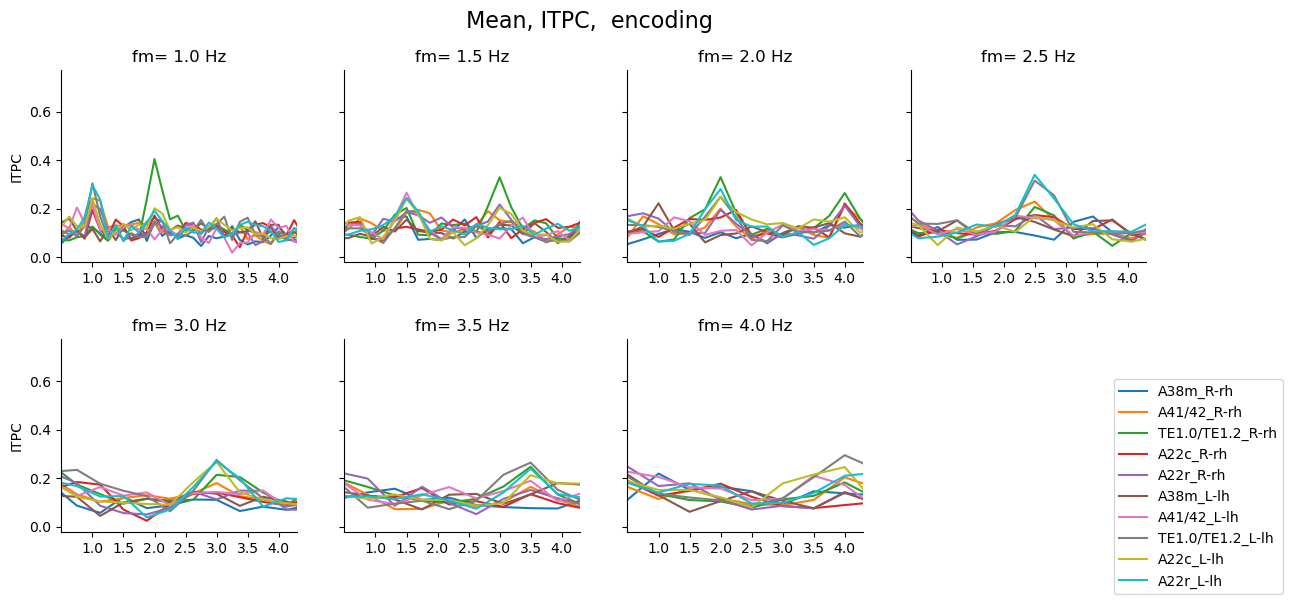

In [22]:
stg_l = ['A38m_L-lh', 'A41/42_L-lh', 'TE1.0/TE1.2_L-lh', 'A22c_L-lh',  'A22r_L-lh']    #'A38l_L-lh',
stg_r = ['A38m_R-rh', 'A41/42_R-rh', 'TE1.0/TE1.2_R-rh', 'A22c_R-rh', 'A22r_R-rh'] # , 'A38l_R-rh'

fig, ax = plt.subplots(2, 4, sharex=False, sharey=True, figsize=(14, 6))
fig.suptitle(f' Mean, ITPC,  {condition}', fontsize=16)
plt.subplots_adjust(hspace=0.4)
for j, fm in enumerate(['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']):
    for label_name in stg_r+stg_l:
        ix_roi = label2index[label_name]
        _itpc = np.stack(itpc_group[j], axis=0).mean(axis=0)
        _xfreq = np.stack(xfreq_group[j], axis=0).mean(axis=0)
        ax[j//4, j%4].plot(_xfreq, _itpc[ix_roi, :].T)
        #ax[j//4, j%4].plot(_xfreq, _itpc[ix_roi, :].mean(axis=0), linewidth=2, color='k')
    
    ax[j//4, j%4].set_title(f'fm= {fm} Hz')
    ax[j//4, j%4].set_xlim(0.5, 4.3)
    #ax[j//4, j%4].set_ylim(0, 2000)
    ax[j//4, j%4].set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
    #ax[j//4, j%4].set_yticks([])
    ax[j//4, j%4].spines['top'].set_visible(False)
    ax[j//4, j%4].spines['right'].set_visible(False)
    #ax[j//4, j%4].spines['left'].set_visible(False)
    #ax[j//4, j%4].grid(True)
    ax[0, 0].set_ylabel('ITPC')
    ax[1, 0].set_ylabel('ITPC')
    if j==5:
        fig.legend(stg_r+stg_l, loc='lower right');
    
plt.delaxes(ax[1, 3]) ;
plt.savefig(os.path.join(outputs_group, f'itpc_seeds_{condition}.png'), dpi=300)
plt.savefig(os.path.join(outputs_group, f'itpc_seeds_{condition}.eps'), dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


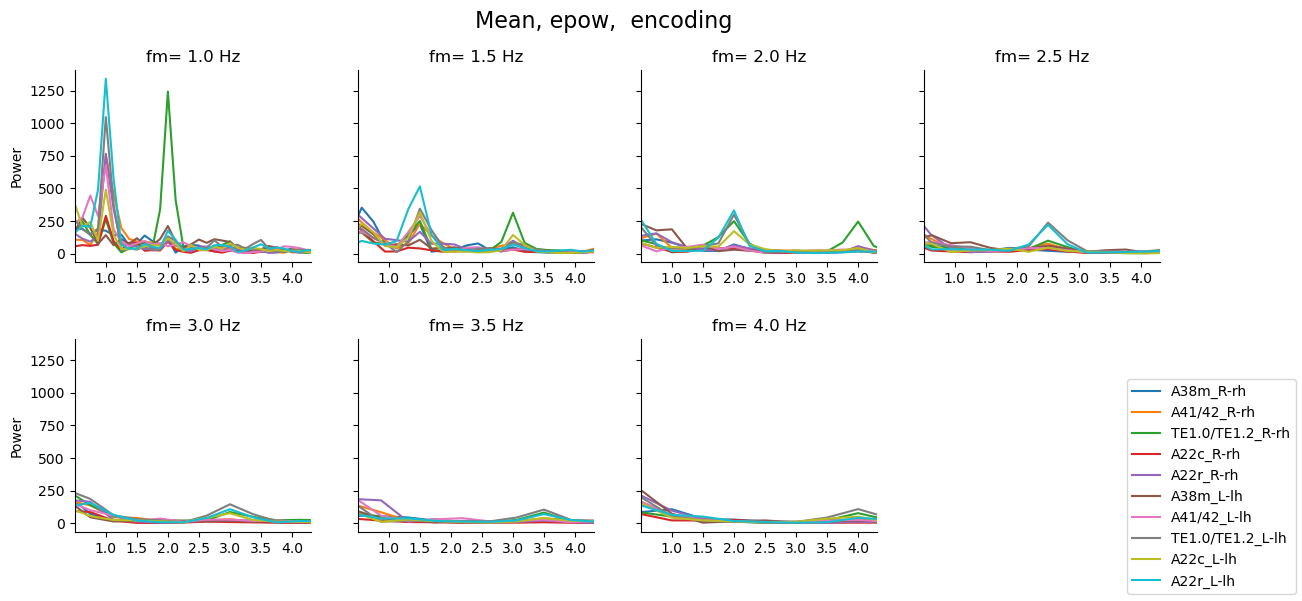

In [23]:
stg_l = ['A38m_L-lh', 'A41/42_L-lh', 'TE1.0/TE1.2_L-lh', 'A22c_L-lh',  'A22r_L-lh']    #'A38l_L-lh',
stg_r = ['A38m_R-rh', 'A41/42_R-rh', 'TE1.0/TE1.2_R-rh', 'A22c_R-rh', 'A22r_R-rh'] # , 'A38l_R-rh'

fig, ax = plt.subplots(2, 4, sharex=False, sharey=True, figsize=(14, 6))
fig.suptitle(f' Mean, epow,  {condition}', fontsize=16)
plt.subplots_adjust(hspace=0.4)
for j, fm in enumerate(['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']):
    for label_name in stg_r+stg_l:
        ix_roi = label2index[label_name]
        _itpc = np.stack(epow_group[j], axis=0).mean(axis=0)
        _xfreq = np.stack(xfreq_group[j], axis=0).mean(axis=0)
        ax[j//4, j%4].plot(_xfreq, _itpc[ix_roi, :].T)
        #ax[j//4, j%4].plot(_xfreq, _itpc[ix_roi, :].mean(axis=0), linewidth=2, color='k')
    
    ax[j//4, j%4].set_title(f'fm= {fm} Hz')
    ax[j//4, j%4].set_xlim(0.5, 4.3)
    #ax[j//4, j%4].set_ylim(0, 2000)
    ax[j//4, j%4].set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4])
    #ax[j//4, j%4].set_yticks([])
    ax[j//4, j%4].spines['top'].set_visible(False)
    ax[j//4, j%4].spines['right'].set_visible(False)
    #ax[j//4, j%4].spines['left'].set_visible(False)
    #ax[j//4, j%4].grid(True)
    ax[0, 0].set_ylabel('Power')
    ax[1, 0].set_ylabel('Power')
    if j==5:
        fig.legend(stg_r+stg_l, loc='lower right');
    
plt.delaxes(ax[1, 3]) ;
plt.savefig(os.path.join(outputs_group, f'epow_seeds_{condition}.png'), dpi=300)
plt.savefig(os.path.join(outputs_group, f'epow_seeds_{condition}.eps'), dpi=300)